# Comparison of MLE and Bayesian Estimation notebook

For Gaussian random variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

## MLE

In [2]:
# true mu and sigma^2
mu = 153 # 153 ft
var = 15 # 15 ft

In [50]:
# simulate observed data
data = np.random.normal(mu, np.sqrt(var), size=15)

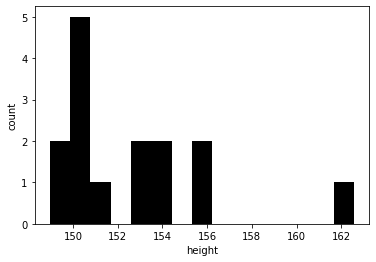

In [83]:
plt.hist(data, bins=15, color='black')
plt.xlabel('height')
plt.ylabel('count')
plt.show()

In [51]:
# mean and variance of observed data
np.mean(data), np.var(data)

(152.62013634103923, 11.270429042837977)

### Define Gaussian functions

In [52]:
# function
def gaussian_f(m, v, x):
    
    out = np.zeros(x.shape)
    for i,xx in enumerate(x):
        out[i] = (1 / np.sqrt(2*np.pi*v)) * np.exp(-(xx- m)**2 / (2*v))
    return out

In [53]:
# single data prediction
def gaussian(m, v, x):
    
    out = (1 / np.sqrt(2*np.pi*v)) * np.exp(-(x - m)**2 / (2*v))
    return out

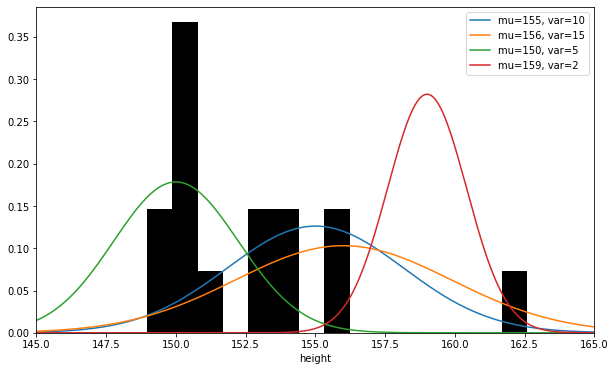

In [84]:
# plot possible models for this data

x = np.arange(145, 170, 0.01)

plt.figure(figsize=(10,6))
plt.hist(data, bins=15, density=True, color='black')
plt.plot(x, gaussian_f(155, 10, x), label='mu=155, var=10')
plt.plot(x, gaussian_f(156, 15, x), label='mu=156, var=15')
plt.plot(x, gaussian_f(150, 5, x), label='mu=150, var=5')
plt.plot(x, gaussian_f(159, 2, x), label='mu=159, var=2')
plt.xlim([145,165])
plt.xlabel('height')
plt.legend()
plt.show()

### Calculation of likelihood function

In [64]:
mus = np.arange(140, 170, 0.1)
var_s = np.arange(4, 20, 0.1)

$$L(\theta) = \prod_{i=1}^N f(x_i|\theta)$$

In [66]:
params = np.zeros((len(mus), len(var_s)))
for i,m in enumerate(mus):
    for j,v in enumerate(var_s):
        p = 1
        for x in data:
            p *= gaussian(m, v, x)
        params[i,j] = p

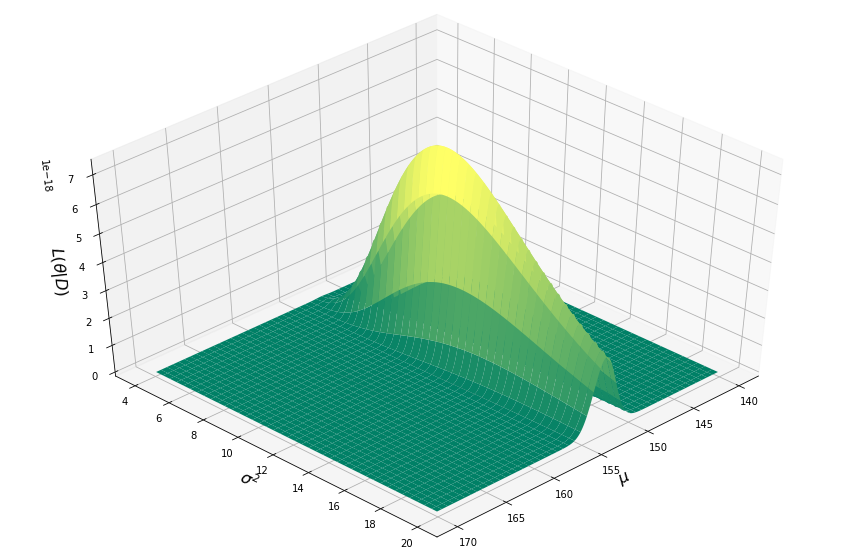

In [94]:
# plot likelihood

X,Y = np.meshgrid(var_s, mus)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Y, X, params, cmap='summer')
ax.view_init(azim=45, elev=45)
ax.set_xlabel(r'$\mu$', fontsize=16)
ax.set_ylabel(r'$\sigma^2$', fontsize=16)
ax.set_zlabel(r'$L(\theta|D)$', fontsize=16)
plt.show()

## Bayesian estimation

In [114]:
# define prior distribution

mu_p = 159
var_p = 9

priors = np.random.normal(mu_p, np.sqrt(var_p), size=10)

In [115]:
priors

array([160.53089876, 153.85039206, 157.30618363, 160.53042653,
       164.02631202, 156.44185884, 157.10358865, 158.11960921,
       163.52232822, 160.64114918])

| Prev. Year |1|2|3|4|5|6|7|8|9|10|
| --- | --- | --- |--- |--- |--- |--- |--- |--- |--- |--- |
|-| 160.5 | 153.8 |157.3|160.5 |164.0 |156.4 |157.1 |158.1 |163.5 |160.6 |

In [119]:
np.mean(priors), np.var(priors)

(159.20727471094207, 9.2967889987767)

In [117]:
# multiply likelihood and prior distribution, likelihood assuming fixed variance

x = np.arange(145, 170, 0.01)

like = gaussian_f(int(np.mean(data)), int(np.var(data)), x)
prior = gaussian_f(int(np.mean(priors)), int(np.var(priors)), x)

post = ((like.sum() + prior.sum()) / 2.0) * ((like*prior).astype(float) / (like*prior).astype(float).sum())

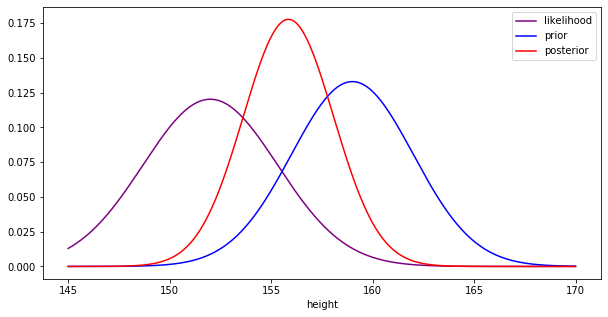

In [120]:
# plot 3 distributions

plt.figure(figsize=(10,5))
plt.plot(x, like, 'purple', label='likelihood')
plt.plot(x, prior, 'blue', label='prior')
plt.plot(x, post, 'r', label='posterior')
plt.legend()
plt.xlabel('height')
plt.show()

In [61]:
# mu and var of posterior distribution

post_mu = x[np.argmax(post)]

norm =  np.var(like)*var
post_var = norm / np.var(post)

post_mu, post_var

(155.84999999999013, 7.059203823938269)